# Latihan Soal - Preprocessing Data

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


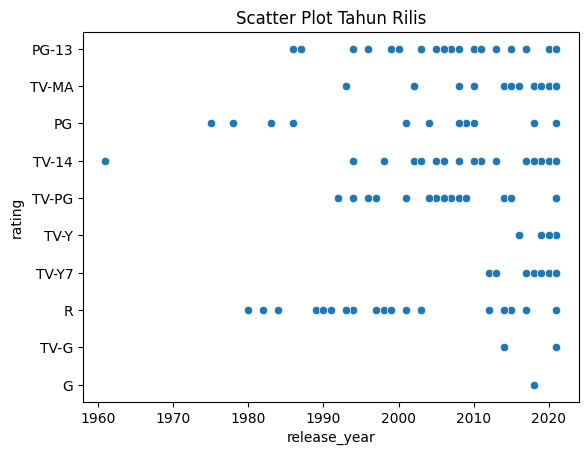

In [3]:
# Visualisasi Scatter Plot rating
sns.scatterplot(x='release_year', y='rating', data=df)
plt.title("Scatter Plot Tahun Rilis")
plt.show()

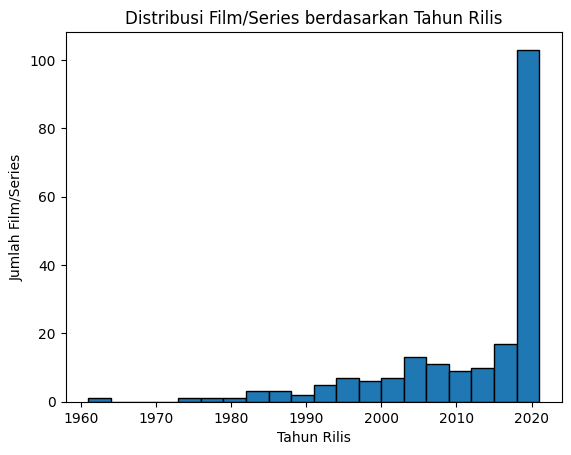

In [4]:
# Visualisasi Histogram release_year
plt.hist(df["release_year"], bins=20, edgecolor="black")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Film/Series")
plt.title("Distribusi Film/Series berdasarkan Tahun Rilis")
plt.show()

In [5]:
# Menghitung statistik deskriptif
df.describe()

,release_year
count,200.000000
mean,2012.230000
std,11.609089
min,1961.000000
25%,2005.750000
50%,2018.000000
75%,2021.000000
max,2021.000000


In [6]:
# Cara mendeteksi missing Data 
df.isnull().sum()

show_id          0
type             0
title            0
director        63
cast            20
country         64
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [7]:
# Cara menangani missing data
# Hapus baris dengan missing
df_clean = df.dropna()
print(df_clean.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [15]:
df['duration_num'] = df["duration"].str.extract(r'(\d+)').astype(float)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Contoh dataset sederhana
data = {
    'duration': [30, 60, 90, 120, 150]
}
df_num = pd.DataFrame(data)

print("Sebelum Normalisasi:")
print(df)

scaler = MinMaxScaler(feature_range=(0, 1))
df['duration_scaled'] = scaler.fit_transform(df[['duration']])

print("\nSesudah Normalisasi:")
print(df)

Sebelum Normalisasi:
   duration  duration_scaled
0        30             0.00
1        60             0.25
2        90             0.50
3       120             0.75
4       150             1.00

Sesudah Normalisasi:
   duration  duration_scaled
0        30             0.00
1        60             0.25
2        90             0.50
3       120             0.75
4       150             1.00


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

df_scaled = pd.DataFrame(df_scaled, columns=df_num.columns)